<a href="https://colab.research.google.com/github/vaibhavi128/Machine-Learning-Assignment-/blob/main/K_Means_Clustreing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Segmentation**

**Dataset**: Mall Customer Segmentation Dataset

**Description**: Contains customer data including annual income, spending score, and age. Can be used to segment customers into different groups based on their purchasing behavior.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
# Load dataset
df = pd.read_csv("Mall_Customers.csv")  # Ensure correct file path
print(df.head())  # Display first few rows

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# Data Preprocessing
df = df.rename(columns={"Annual Income (k$)": "Annual_Income", "Spending Score (1-100)": "Spending_Score"})
df = df.drop(columns=["CustomerID", "Gender"])  # Remove non-numeric features

In [4]:
df.head(5)

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [5]:
df.describe()

,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
df

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [8]:
missing_count=df.isnull().sum()
missing_count

,0
Age,0
Annual_Income,0
Spending_Score,0


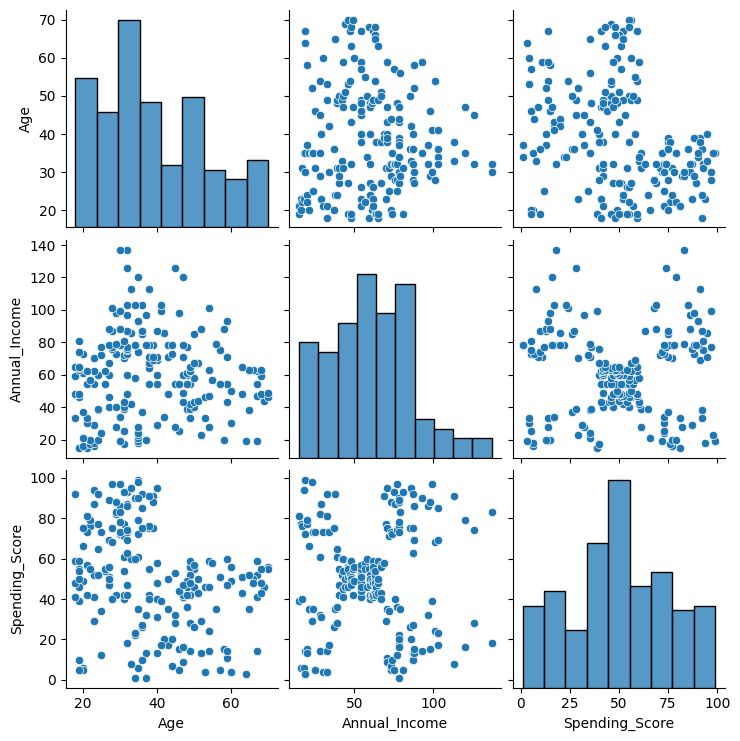

In [9]:
# Exploratory Data Analysis (EDA)
sns.pairplot(df)
plt.show()

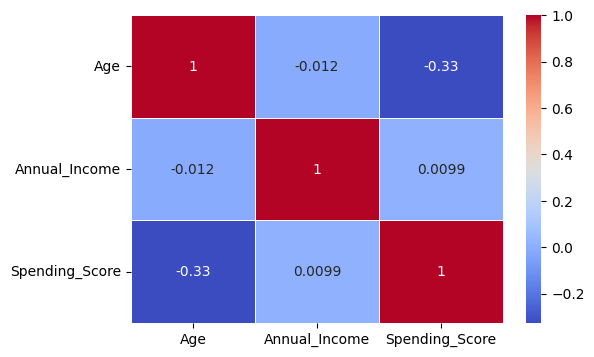

In [10]:
# Correlation Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

In [11]:
# Feature Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


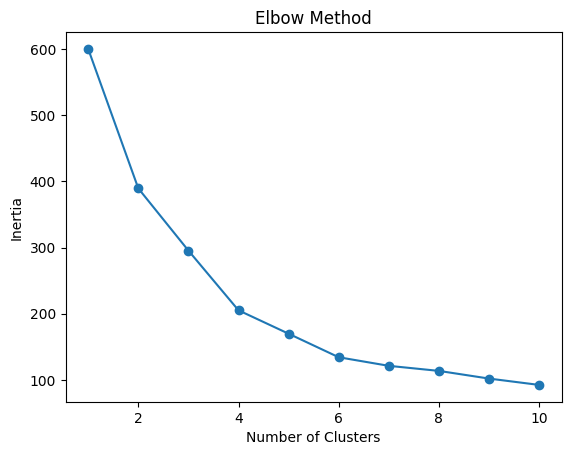

In [12]:
# Finding Optimal K using Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [13]:
# Applying K-Means with optimal K (e.g., K=4 based on Elbow method)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

In [14]:
df['Cluster']

,Cluster
0,2
1,2
2,2
3,2
4,2
...,...
195,1
196,3
197,1
198,3


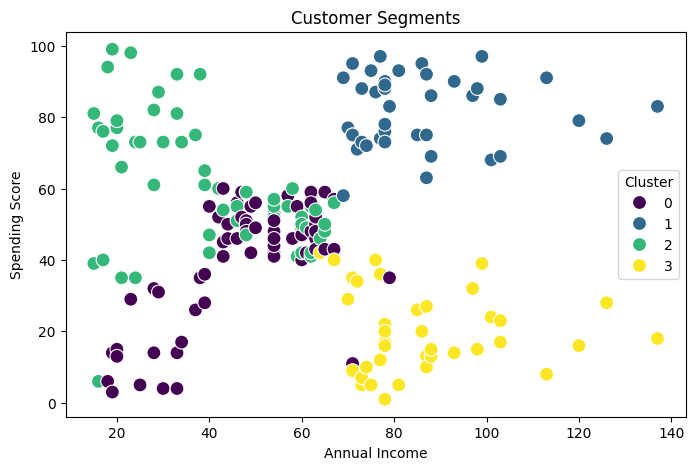

In [15]:
# Cluster Analysis
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Annual_Income'], y=df['Spending_Score'], hue=df['Cluster'], palette='viridis', s=100)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segments")
plt.show()

In [16]:
y_pred = kmeans.labels_
print("Silhouette Score:", silhouette_score(df_scaled, y_pred))

Silhouette Score: 0.4039582785148566


<ipython-input-17-683a1209298c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cluster'], y=df['Annual_Income'], palette='Set2')


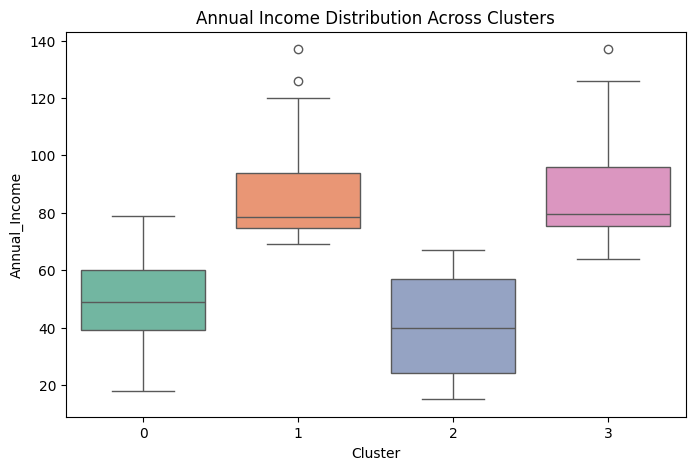

In [17]:
# Boxplot of Clusters
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Cluster'], y=df['Annual_Income'], palette='Set2')
plt.title("Annual Income Distribution Across Clusters")
plt.show()

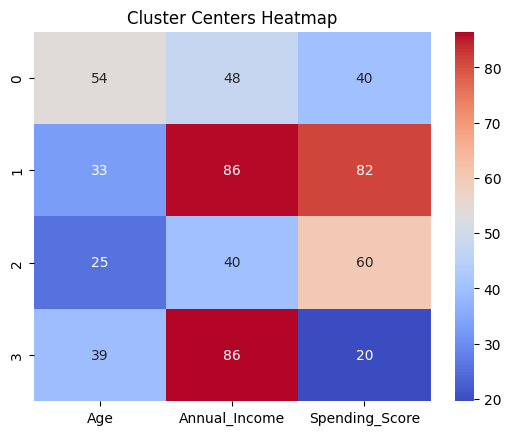

In [18]:
# Heatmap of Cluster Centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df.columns[:-1])
sns.heatmap(cluster_centers, annot=True, cmap="coolwarm")
plt.title("Cluster Centers Heatmap")
plt.show()

In [21]:
# Testing with Dummy Data
dummy_data = np.array([[30, 45, 75]])  # Example: Customer with Age=30, Annual Income=45k and Spending Score=75
# Create a DataFrame with the same column names as the original data
dummy_df = pd.DataFrame(dummy_data, columns=['Age', 'Annual_Income', 'Spending_Score'])
dummy_scaled = scaler.transform(dummy_df) # Use the DataFrame for scaling
predicted_cluster = kmeans.predict(dummy_scaled)
print("Dummy Data Predicted Cluster:", predicted_cluster[0])

Dummy Data Predicted Cluster: 2


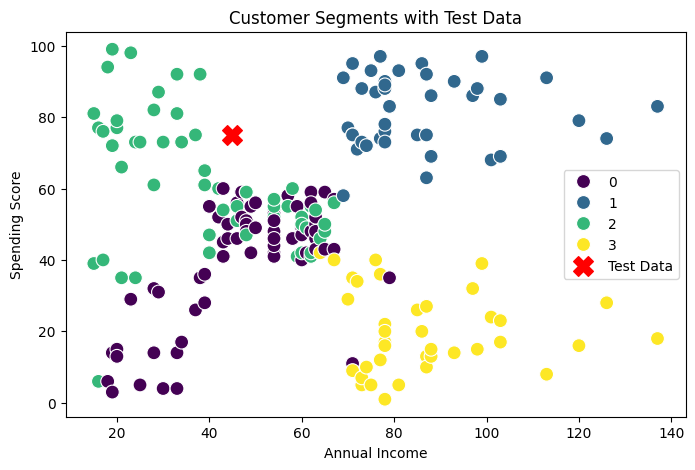

In [23]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Annual_Income'], y=df['Spending_Score'], hue=df['Cluster'], palette='viridis', s=100)
plt.scatter(dummy_data[0][1], dummy_data[0][2], color='red', marker='X', s=200, label='Test Data')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segments with Test Data")
plt.legend()
plt.show()